# Processamento de linguagem natural e modelo de análise de sentimento.

A fim de que seja possível comparar os tópicos abaixo descritos com os itens explicitados pelo barema, encontra-se, nessa célula, um índice comparativo entre ambas partes. Ele foi feito para facilitar a correção dos professores e permitir a existência de uma autonomia na nomenclatura das células de organização.
- Instalação -> tópico 1.0
- Testes isolados - >  tópico 3.8
- Definição de funções -> tópico 3.1 a 3.7
- Testes das funções -> tópico 4.3
- Análise descritiva -> tópico 2.0
- Pré processamento -> tópico 3.0
- Pipeline -> tópico 4.3
- Modelo Bag of words -> tópico 4.0


## 1.0 Instalação

Nessa parte do notebook realiza-se a instalação das bibliotecas que serão utilizadas no decorrer do código, bem como a importação da base de dados que baseia todas as posteriores análises.

### 1.1 Importação das bibliotecas

In [ ]:
# instalação de pacotes para remoção de acentos
!pip install unidecode
# Instalando biblioteca Python "emoji"
!pip install emoji
# Instalação de biblioteca para remoção de stop words
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 13.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.0-py2.py3-none-any.whl size=351211 sha256=0699b603a35e5471d447a5c68d27b073e0361eede58d89634a10c823e69aaec9
  Stored in directory: /root/.cache/pip/wheels/2a/0c/2c/07b5af72b120503fe24590691d24c462a25e5e530db8700a96
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled 

In [ ]:
#importação das bibliotecas:
import pandas as pd
import numpy as np
# bibliotecas utilizadas para tokenização
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#biblioteca para tokenização
from keras.preprocessing.text import Tokenizer
# bibliotecas utilizadas para remoção de stop words
import nltk
nltk.download('punkt')
#importação das bibliotecas para remoção de Stop Words
import spacy
nlp = spacy.cli.download('pt_core_news_sm')
nlp = spacy.load('pt_core_news_sm')
# bibliotecas para remoção de acentos
from unidecode import unidecode
# bibliotecas utilizadas para o tratamento de abreviações
import re
# Instalando biblioteca Python "emoji"
import emoji
# importação de biblioteca para exportação do modelo
import pickle
# importação de biblioteca para separar treino e teste
from sklearn.model_selection import train_test_split
# importação do naive Bayes
from sklearn.naive_bayes import GaussianNB
# Importação de bibliotecas para revocação
from sklearn.metrics import recall_score
# importação de bilbioteca para matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# importação de biblioteca para Word2Vec Skipgram
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### 1.2 Criação da tabela

In [ ]:
#Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')
#importação da base de dados:
df = pd.read_excel('/content/drive/MyDrive/Modulo_6_grupo_1/2-base_10052023-G1.xlsx')
novas_colunas = {
    '"dataPublicada"': 'dataPublicada',
    '"autor"': 'autor',
    '"texto"': 'texto',
    '"sentimento"': 'targetSentimento',
    '"tipoInteracao"': 'tipoInteracao',
    '"anomalia"': 'anomalia',
    '"probabilidadeAnomalia"': 'probabilidadeAnomalia',
    '"linkPost"': 'linkPost',
    '"processado"': 'processado',
    '"contemHyperlink"': 'contemHyperlink'
}

# Renomear as colunas
df = df.rename(columns=novas_colunas)
# Remover linhas sem a coluna "texto"
df = df.dropna(subset=['texto'])
# Filtrar as linhas com base em diferentes condições
df = df[(df['anomalia'] != 1) & (df['autor'] != 'btgpactual') & (df['contemHyperlink'] != 1) & (df['probabilidadeAnomalia'] <= 50)]
# Redefinir o índice
df = df.reset_index(drop=True)

Mounted at /content/drive


##### Balanceamento dos dados com undersampling

In [ ]:
# # Separa os elementos das classes POSITIVE, NEUTRAL e NEGATIVE em três tabelas
# df_classe1 = df.loc[df['sentimento'] == "POSITIVE"]
# df_classe2 = df.loc[df['sentimento'] == "NEUTRAL"]
# df_classe3 = df.loc[df['sentimento'] == "NEGATIVE"]

# # Mantém 988 elementos nas tabelas df_classe1 e df_classe2
# df_classe1 = df_classe1.sample(n=988, random_state=42)
# df_classe2 = df_classe2.sample(n=988, random_state=42)

# # Concatena as três tabelas em uma tabela df1
# df1 = pd.concat([df_classe1, df_classe2, df_classe3], ignore_index=True)

In [ ]:
# # Embaralha as linhas da tabela na variável df
# df = df1.sample(frac=1).reset_index(drop=True)

# # Exibe a tabela resultante
# df['sentimento']

## 2.0 Análise descritiva dos dados

A Análise Descritiva dos Dados é uma técnica importante para obter insights e compreender as características dos dados sem a utilização de modelos estatísticos complexos.

Todas as células componentes dessa parte do notebook se encontram comentadas devido à economia de espaço de processamento e aceleração do tempo de espera da computação de todas as células.

### 2.1 Colunas

Célula que permite a visualização de todas as colunas do dataframe:

In [ ]:
# df.columns


1. **Coluna Id:** A coluna id apresenta o index para visualização da planilha e pode ser usada como chave primária do comentário. No que diz respeito à utilização no modelo, essa coluna não confere relevância para a sua construção, visto que sua utilidade está atrelada apenas ao fato de garantir que cada linha possua um identificador único. Portanto, *essa coluna não será utilizada.*

2. **Coluna dataPublicada:** A coluna data publicada refere-se a data de publicação do comentário. Para a construção do modelo **bag of words**, essa coluna não apresenta relevância, portanto, *não será utilizada*. Posteriormente, sua utilização pode se fazer necessária para a averiguação dos períodos das campanhas.

3. **Coluna autor:** A coluna autor é referente à conta do instagram que realizou o comentário na postagem. Essa coluna não será utilizada diretamente pelo modelo bag of words, mas será importante para o agrupamento de comentários referente à empresa BTG.

4. **Coluna texto:** A coluna texto se refere ao texto presente no comentário realizado. Para a construção do modelo, essa é a coluna com maior relevância, visto que são justamente os conteúdos dos comentários que precisam ser analisados pelo modelo.

5. **Coluna sentimento:** A coluna sentimento é, justamente, o target da classificação que precisamos fazer dos dados. Essa coluna será utilizada para o treinamento posterior do modelo, visto que apresenta o resultado esperado. Contudo, diante de uma análise manual das classificações, foi possível perceber que alguns comentários foram classificados de maneira errônea, dado que possuem um teor positivo mas foram classificados como negativos ou neutros.

6. **Coluna tipoInteracao:** A coluna tipo interação informa o tipo de interação a qual aquele comentário pertence, como, por exemplo, uma resposta ou como marcação. Essa coluna, inicialmente, não será utilizada para a construção do modelo bag of words.

7. **Coluna anomalia:**  Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

8. **Coluna probabilidadeAnomalia:**  Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

9. **Coluna linkPost:** Essa coluna possui o link referente a postagem da qual foram retirados os comentários. Todos os comentários referentes à mesma postagem possuem o link igual. Pensando na análise de sentimento, essa coluna não apresenta relevância, portanto, não será utilizada.

10. **Coluna processado:** Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

11. **Coluna contemHyperlink:** Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.



### 2.2 Funções

Abaixo estão listadas todas as funções presentes nesse notebook e o que elas fazem:
1. **remocaoAcentos:** função que remove todos os acentos presentes nos comentários da coluna texto.
2. **tratamentoMaiusculas:** função que trata todas as letras maiúsculas dos comentários presentes na coluna texto, passando-as para caixa baixa.
3. **conversaoEmojis:** função que converte todo emoji presente na coluna texto para seu significado em inglês.
4. **tratamentoAbreviacoes:** função que converte todas as abreviações para seu significado real, além de remover todas as pontuações e diferentes tipos de marcações comumente utilizadas em redes sociais.
5. **tokenizacaoPalavra:** função que tokeniza em palavras os comentários, separando cada uma delas do todo.
6. **tokenizacaoFrase:** função que tokeniza em frases os comentários, separando cada uma das frases, sejam elas do mesmo comentário ou de comentários diferentes.
7. **remocaoStopWords:** função que remove todas as stopwords presentes nos comentários da coluna texto.
8. **bagOfWords:** função para chamar o modelo de bag of words e salvar um vetor de recorrencia.
9. **pipelineBow:** função que define a pipeline que será utilizada no modelo, com todos os pré-processamentos realizados e o modelo BOW aplicado para gerar um dicionário e um vetor.
10. **contarPalavras:** função para contar quantas vezes cada palavra se repetiu no modelo bag of words.
11. **gerarNuvemPalavras:** função para gerar uma nuvem de palavras utilizando os resultados do modelo bag of words.

###2.3 Visualização gráfica de dados

#### 2.3.1 Valores nulos

Visualização da proporção entre o número de linhas que possuem algum tipo de valor nulo e as linhas que não os possuem.

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # visualizando todos os itens nulos
# print(df.isnull().sum())

# # criando um gráfico de barras para comparar os itens nulos e não nulos
# sns.countplot(x=df.isnull().any(axis=1), hue=df.isnull().any(axis=1))
# plt.title("Itens Nulos vs Não Nulos")
# plt.xlabel("Itens")
# plt.ylabel("Contagem")
# plt.legend(labels=['Itens com valores não nulos', 'Itens com valores nulos'])
# plt.show()

Visualização de ítens nulos em cada uma das colunas do dataframe:

In [ ]:
# # contando os valores nulos em cada coluna
# null_counts = df.isnull().sum()

# # criando um gráfico de barras para mostrar a contagem de valores nulos em cada coluna
# sns.barplot(x=null_counts.index, y=null_counts.values)
# plt.xticks(rotation=90) # adicionando a rotação de 90 graus nas legendas

# # adicionando as etiquetas de texto no topo de cada barra
# for i, v in enumerate(null_counts.values):
#     plt.text(i, v+10, str(v), ha='center', fontsize=12)

# # configurando os rótulos dos eixos e o título do gráfico
# plt.xlabel("Colunas")
# plt.ylabel("Contagem de Valores Nulos")
# plt.title("Contagem de Valores Nulos por Coluna")

# # exibindo o gráfico
# plt.show()

#### 2.2.2 Agrupamento por autores

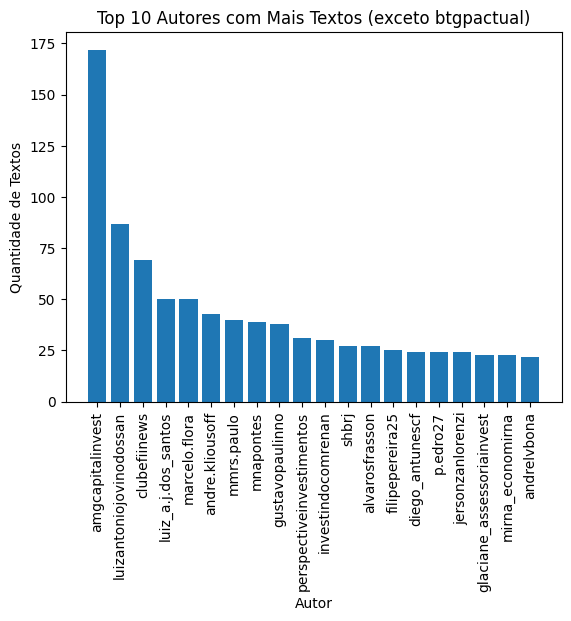

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamento dos textos por autor, excluindo o "btg pactual"
textosPorAutor = df.query("autor != 'btgpactual'").groupby('autor')['texto'].count().reset_index()

# Ordenação dos autores por quantidade de textos
textosPorAutor = textosPorAutor.sort_values('texto', ascending=False).reset_index(drop=True)

# Seleção dos 10 autores com mais textos
top10Autores = textosPorAutor.head(20)

# Gráfico de barras com a quantidade de textos por autor
plt.bar(top10Autores['autor'], top10Autores['texto'])
plt.xticks(rotation=90)
plt.xlabel('Autor')
plt.ylabel('Quantidade de Textos')
plt.title('Top 10 Autores com Mais Textos (exceto btgpactual)')
plt.show()


In [ ]:
df_filtered = df.query("autor == 'amgcapitalinvest'")
df_filtered.head(10)

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
875,382158,"""2022-03-24 11:43:00""",amgcapitalinvest,(link na bio) Enriquecer é uma questão de esco...,POSITIVE,marcação,0,49,https://www.instagram.com/p/CbfYbbmsaOS/,0,0
918,418930,"""2022-03-26 10:07:00""",amgcapitalinvest,"Hoje, a capital dos gaúchos completa 250 anos!...",POSITIVE,marcação,0,48,https://www.instagram.com/p/CbkXDKvA0Jj/,0,0
921,419736,"""2022-03-26 09:38:00""",amgcapitalinvest,Evento Voz Feminina no btgpactual ❣️,NEUTRAL,marcação,0,30,https://www.instagram.com/p/CbkTu61ujFC/,0,0
925,438730,"""2022-03-27 11:00:00""",amgcapitalinvest,🖥 www.amgcapital.com.br 📧 E-mail: contato@amgc...,NEUTRAL,marcação,0,44,https://www.instagram.com/p/CbnB5pRqrl6/,0,0
935,457530,"""2022-03-28 10:22:00""",amgcapitalinvest,🖥 www.amgcapital.com.br 📧 E-mail: contato@amgc...,NEUTRAL,marcação,0,44,https://www.instagram.com/p/CbpiV-zhBbD/,0,0
995,478755,"""2022-03-29 12:58:00""",amgcapitalinvest,A AMG Capital e o BTG Pactual se juntaram a um...,POSITIVE,marcação,0,27,https://www.instagram.com/tv/CbsY8bhKHAD/,0,0
1020,497404,"""2022-03-30 12:22:00""",amgcapitalinvest,"(link na bio) Ao fazer investimentos, você não...",POSITIVE,marcação,0,43,https://www.instagram.com/p/Cbu5pMEKxj6/,0,0
1081,516231,"""2022-03-31 12:24:00""",amgcapitalinvest,Já atualizou o seu app BTG Trader? A nova vers...,POSITIVE,marcação,0,40,https://www.instagram.com/tv/CbxeqlbMSYz/,0,0
1131,548030,"""2022-04-02 12:12:00""",amgcapitalinvest,Carteiras recomendadas de Abril no ar 📈 Arras...,NEUTRAL,marcação,0,33,https://www.instagram.com/p/Cb2m4YYJzUq/,0,0
1184,586434,"""2022-04-04 12:45:00""",amgcapitalinvest,"(link na bio) Ao fazer investimentos, você não...",POSITIVE,marcação,0,34,https://www.instagram.com/p/Cb70WBuv4We/,0,0


In [ ]:
df_filtered = df.query("autor == 'clubefiinews'")
df_filtered.head(10)

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
6,8,"""2022-03-03 20:02:00""",clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,0,39,https://www.instagram.com/p/CaqMkFfOgl9/,0,0
436,96787,"""2022-03-09 14:57:00""",clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,POSITIVE,marcação,0,36,https://www.instagram.com/p/Ca5GeHBOJ5X/,0,0
552,210901,"""2022-03-15 13:11:00""",clubefiinews,O Fundo Imobiliário BM Brascan Lajes Corporati...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CbIXBJ1ur3t/,0,0
557,215305,"""2022-03-15 18:40:00""",clubefiinews,O Fundo Imobiliário Torre Norte (TRNT11) assin...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CbI86BFOzO9/,0,0
646,255013,"""2022-03-17 20:15:00""",clubefiinews,"""O Fundo Imobiliário BTG Pactual Logística (BT...",POSITIVE,marcação,0,29,https://www.instagram.com/p/CbORIPEsx96/,0,0
654,267351,"""2022-03-18 11:41:00""",clubefiinews,O Fundo Imobiliário Torre Almirante (ALMI11) f...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CbP7HL7Ohju/,0,0
819,347558,"""2022-03-22 16:27:00""",clubefiinews,O Fundo Imobiliário BTG Pactual Logística (BTL...,POSITIVE,marcação,0,31,https://www.instagram.com/p/CbavLykuWSj/,0,0
833,361959,"""2022-03-23 10:20:00""",clubefiinews,A administradora BTG Pactual e a gestora BlueM...,NEUTRAL,marcação,0,27,https://www.instagram.com/p/Cbcp57HORy9/,0,0
1005,483603,"""2022-03-29 19:14:00""",clubefiinews,O Fundo Imobiliário VBI Logístico (LVBI11) pag...,POSITIVE,marcação,0,27,https://www.instagram.com/p/CbtDprou6-Q/,0,0
1229,609244,"""2022-04-05 17:10:00""",clubefiinews,O Fundo Imobiliário Parque Dom Pedro Shopping ...,POSITIVE,marcação,0,38,https://www.instagram.com/p/Cb-3I7xus6W/,0,0


In [ ]:
df_filtered = df.query("autor == 'perspectiveinvestimentos'")
df_filtered.head(10)

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
1340,741286,"""2022-04-12 18:34:00""",perspectiveinvestimentos,"Se falou em competitividade, ligar os motores,...",POSITIVE,marcação,0,48,https://www.instagram.com/p/CcRCjdWJTkg/,0,0
1464,919103,"""2022-04-22 10:24:00""",perspectiveinvestimentos,Já se imaginou trabalhando no escritório top 2...,POSITIVE,marcação,0,36,https://www.instagram.com/p/Ccp3s5SpU_h/,0,0
1585,1004792,"""2022-04-27 00:40:00""",perspectiveinvestimentos,Pare de sonhar acordado: trabalhar para o escr...,POSITIVE,marcação,0,48,https://www.instagram.com/p/Cc1vlftNGyE/,0,0
1799,1098869,"""2022-05-06 13:56:00""",perspectiveinvestimentos,Não temos nem palavras para expressar o orgulh...,POSITIVE,marcação,0,36,https://www.instagram.com/p/CdOV2-FO7cH/,0,0
2086,1215603,"""2022-05-19 10:00:00""",perspectiveinvestimentos,"O #tbt de hoje é recente! No clique, nosso hea...",POSITIVE,marcação,0,41,https://www.instagram.com/p/CdvZKwPsaGM/,0,0
2245,1274990,"""2022-05-25 12:10:00""",perspectiveinvestimentos,Amanhã começa a Expo Indústria Maranhão! Produ...,NEUTRAL,marcação,0,38,https://www.instagram.com/p/Cd_E0d4MNlG/,0,0
2317,1295132,"""2022-05-27 14:29:00""",perspectiveinvestimentos,"Quem só vê sucesso, não vê o esforço. Venha c...",POSITIVE,marcação,0,29,https://www.instagram.com/tv/CeEdqlzjETZ/,0,0
2331,1296332,"""2022-05-27 17:30:00""",perspectiveinvestimentos,Parte do nosso time está participando do BTG 2...,POSITIVE,marcação,0,22,https://www.instagram.com/p/CeEzBhDsnDw/,0,0
2705,1402076,"""2022-06-07 18:58:00""",perspectiveinvestimentos,Você quer mudar de carreira ou fazer parte do ...,POSITIVE,marcação,0,38,https://www.instagram.com/p/CehR0OPsQH3/,0,0
2977,1493403,"""2022-06-17 10:38:00""",perspectiveinvestimentos,Mais que assessor: um profissional do escritór...,POSITIVE,marcação,0,48,https://www.instagram.com/p/Ce6IkugLKQP/,0,0


In [ ]:
df_filtered = df.query("autor == 'shbrj'")
df_filtered.head(30)

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
2162,1228893,"""2022-05-20 18:04:00""",shbrj,Você já garantiu a sua inscrição na 3ª Etapa d...,POSITIVE,marcação,0,40,https://www.instagram.com/p/Cdy0843NHeG/,0,0
2398,1322828,"""2022-05-30 12:01:00""",shbrj,🏆 Resultado da 3ª Etapa do Ranking SHB 22 28 ...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CeL7v2utBfI/,0,0
2672,1392076,"""2022-06-06 18:01:00""",shbrj,"""4ª Etapa do Ranking SHB 2022 Resultados do d...",NEUTRAL,marcação,0,47,https://www.instagram.com/p/CeemfS0rZAv/,0,0
2674,1392176,"""2022-06-06 18:03:00""",shbrj,"""4ª Etapa do Ranking SHB 2022 Resultados do d...",NEUTRAL,marcação,0,38,https://www.instagram.com/p/CeemzZOPzw5/,0,0
2876,1468476,"""2022-06-14 18:04:00""",shbrj,As provas do Concurso de Saltos Santa Cecília ...,POSITIVE,marcação,0,50,https://www.instagram.com/p/CezM2VWrDAm/,0,0
3392,1639860,"""2022-07-04 13:00:00""",shbrj,Esse final de semana aconteceu a 5ª Etapa do R...,NEUTRAL,marcação,0,44,https://www.instagram.com/p/CfmKXUQraRq/,0,0
5945,2053293,"""2022-08-17 18:04:00""",shbrj,Falta menos de um mês para a Copa Sabemi e as ...,POSITIVE,marcação,0,49,https://www.instagram.com/p/ChX_s-SNLyA/,0,0
6108,2069591,"""2022-08-19 12:05:00""",shbrj,A 6ª Etapa do Ranking SHB acontecerá no final ...,POSITIVE,marcação,0,48,https://www.instagram.com/p/ChcgHLDNkSA/,0,0
6613,2229951,"""2022-09-05 18:37:00""",shbrj,Esse final de semana aconteceu a 6ª Etapa do R...,NEUTRAL,marcação,0,44,https://www.instagram.com/p/CiI--3Qr916/,0,0
6909,2326285,"""2022-09-15 20:19:00""",shbrj,Nem mesmo a chuva ofusca o brilhantismo dos ca...,NEUTRAL,marcação,0,41,https://www.instagram.com/p/Cii6a_nL9k2/,0,0


In [ ]:
df_filtered = df.query("autor == 'alvarosfrasson'")
df_filtered.head(30)

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
108,147,"""2022-02-24 16:18:00""",alvarosfrasson,Impactos nos mercados em razão do conflito ent...,POSITIVE,marcação,0,28,https://www.instagram.com/tv/CaXvyRDBO4Y/,0,0
130,173,"""2022-02-23 21:47:00""",alvarosfrasson,Segundo dia do CEO Conference foi um verdadeir...,POSITIVE,marcação,0,49,https://www.instagram.com/p/CaVyfSAMurK/,0,0
1324,716681,"""2022-04-11 10:36:00""",alvarosfrasson,"No último final de semana, tive o prazer de pa...",POSITIVE,marcação,0,38,https://www.instagram.com/p/CcNnGkVO3Lk/,0,0
1353,758850,"""2022-04-13 18:00:00""",alvarosfrasson,"O câmbio furou consistentemente o piso de R$5,...",POSITIVE,marcação,0,46,https://www.instagram.com/p/CcTjjwqvo3U/,0,0
1419,851873,"""2022-04-18 18:09:00""",alvarosfrasson,O aumento significativo nos preços dos bens e ...,NEGATIVE,marcação,0,38,https://www.instagram.com/p/CcgcdRvOWb7/,0,0
2580,1353251,"""2022-06-02 16:09:00""",alvarosfrasson,Um breve resumo do cenário macro. Arraste pro ...,POSITIVE,marcação,0,31,https://www.instagram.com/p/CeUGkg9uwOt/,0,0
3327,1625639,"""2022-07-01 10:28:00""",alvarosfrasson,Já está disponível o nosso relatório de estrat...,NEUTRAL,marcação,0,27,https://www.instagram.com/p/CfeKjRHuFLs/,0,0
3351,1628859,"""2022-07-01 18:31:00""",alvarosfrasson,Há três anos eu embarquei numa jornada profiss...,POSITIVE,marcação,0,29,https://www.instagram.com/p/CffB2QPvM3M/,0,0
4036,1718060,"""2022-07-12 17:19:00""",alvarosfrasson,Um pouco do que rolou na 2ª edição do BTG Talk...,POSITIVE,marcação,0,42,https://www.instagram.com/reel/Cf7OO-YrOLy/,0,0
4151,1726827,"""2022-07-13 15:45:00""",alvarosfrasson,"Para o cenário de inflação no Brasil, o IPCA d...",NEUTRAL,marcação,0,28,https://www.instagram.com/p/Cf9oXW7uqDr/,0,0


In [ ]:
df_filtered = df.query("autor == 'glaciane_assessoriainvest'")
df_filtered.head(30)

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
4880,1801625,"""2022-07-21 17:43:00""",glaciane_assessoriainvest,#Repost btgpactual with use.repost ・・・ A CSN M...,NEGATIVE,marcação,0,37,https://www.instagram.com/p/CgScO93pg7s/,0,0
5229,1881308,"""2022-07-30 05:53:00""",glaciane_assessoriainvest,Melhor Morning Call do Brasil! De segunda a se...,POSITIVE,marcação,0,28,https://www.instagram.com/reel/CgoV0AZjO31/,0,0
5263,1902685,"""2022-08-01 12:18:00""",glaciane_assessoriainvest,#Repost btgpactual with use.repost ・・・ Carteir...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CguLxhbOgDw/,0,0
5280,1910196,"""2022-08-02 08:00:00""",glaciane_assessoriainvest,#Repost alvarosfrasson with use.repost ・・・ É h...,NEUTRAL,marcação,0,49,https://www.instagram.com/p/CgwTEMDuRcn/,0,0
5530,1975634,"""2022-08-09 12:38:00""",glaciane_assessoriainvest,#Repost btgpactual with use.repost ・・・ O BTG P...,POSITIVE,marcação,0,39,https://www.instagram.com/p/ChC0eRVObJj/,0,0
5543,1975652,"""2022-08-09 08:19:00""",glaciane_assessoriainvest,Quem gostaria de chegar em um momento da vida ...,POSITIVE,marcação,0,34,https://www.instagram.com/p/ChCW1CguCGA/,0,0
5664,2002564,"""2022-08-12 10:32:00""",glaciane_assessoriainvest,#Repost btgpactual with use.repost ・・・ Mais um...,NEUTRAL,marcação,0,49,https://www.instagram.com/tv/ChKUTPgjA5n/,0,0
5914,2043790,"""2022-08-16 18:17:00""",glaciane_assessoriainvest,#Repost btgpactual with use.repost ・・・ Conheça...,POSITIVE,marcação,0,45,https://www.instagram.com/p/ChVcznBJNyO/,0,0
6219,2106630,"""2022-08-23 12:32:00""",glaciane_assessoriainvest,#Repost btgpactual with use.repost ・・・ Nos últ...,NEUTRAL,marcação,0,35,https://www.instagram.com/p/Chm27d7OyDJ/,0,0
6349,2133773,"""2022-08-26 09:51:00""",glaciane_assessoriainvest,#Repost alvarosfrasson with use.repost ・・・ O c...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/ChuS4-cOIiA/,0,0


In [ ]:
# Lista de autores a serem removidos
autores_remover = ['amgcapitalinvest', 'clubefiinews', 'perspectiveinvestimentos', 'shbrj', 'alvarosfrasson', 'glaciane_assessoriainvest']
# Filtrar e remover as linhas com os autores especificados
df = df[~df['autor'].isin(autores_remover)]
df

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
1,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
2,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
3,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
4,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9480,3042412,"""2022-11-30 07:57:00""",marcinho_sousa,@btgpactual sério isso ? Só menos informados ...,NEGATIVE,comentário,0,28,https://www.instagram.com/p/CljbgSRuc33/#18031...,0,0
9482,3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
9483,3044012,"""2022-11-30 12:00:00""",danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
9485,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


In [ ]:
def remover_linhas_com_texto(df, texto):
    df = df[~df['texto'].str.contains(texto)]
    return df

# Remover linhas com a palavra "repost" no texto
df = remover_linhas_com_texto(df, '#repost')
df = remover_linhas_com_texto(df, '#Repost')
df = remover_linhas_com_texto(df, 'flamengo')
df = remover_linhas_com_texto(df, 'fluzao')
df = remover_linhas_com_texto(df, 'flu')
df = remover_linhas_com_texto(df, 'palmeiras')
df

,id,dataPublicada,autor,texto,targetSentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
3,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
4,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
5,7,"""2022-03-03 20:21:00""",donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,0,46,https://www.instagram.com/p/CaqPAzlObCu/,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9480,3042412,"""2022-11-30 07:57:00""",marcinho_sousa,@btgpactual sério isso ? Só menos informados ...,NEGATIVE,comentário,0,28,https://www.instagram.com/p/CljbgSRuc33/#18031...,0,0
9482,3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
9483,3044012,"""2022-11-30 12:00:00""",danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
9485,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


### 2.4 Análise dos sentimentos

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Contar a quantidade de dados para cada combinação de marcação e tipo de interação
# contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# # Criar o gráfico de barras agrupadas
# contagem.plot(kind='bar', stacked=True)

# # Configurar os rótulos dos eixos
# plt.xlabel('Tipo de Interação')
# plt.ylabel('Quantidade de Dados')

# # Exibir o gráfico
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Contar a quantidade de dados para cada combinação de marcação e tipo de interação
# contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# # Cores das colunas
# cores = [ '#FF0000', '#C0C0C0', '#008000']

# # Criar o gráfico de barras agrupadas com as cores personalizadas
# contagem.plot(kind='bar', stacked=True, color=cores)

# # Configurar os rótulos dos eixos
# plt.xlabel('Tipo de Interação')
# plt.ylabel('Quantidade de Dados')

# # Exibir o gráfico
# plt.show()


## 6.0 Modelos

### 6.4 Rede Neural com Transformers Sentence Embedding

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=53d52f66d5f7bad9594a72c10c6ff857f366b94876128e1f24e9402806b763a0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sentence_transformers import SentenceTransformer

In [ ]:
#Importa biblioteca keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import seaborn as sns

In [ ]:
model = SentenceTransformer('distiluse-base-multilingual-cased')

In [ ]:
sentimento_trasformers = pd.DataFrame(df['targetSentimento'])

In [ ]:
# Calcula os embeddings para a coluna de sentenças
embeddings_liz = model.encode(df['texto'].tolist())

# Cria um novo DataFrame com os embeddings
embeddings_df = pd.DataFrame(embeddings_liz)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#inicializa o oversampler
oversampler = RandomOverSampler(random_state=42)

#aplica o oversampling nos dado
embeddings_df, sentimento_trasformers = oversampler.fit_resample(embeddings_df, sentimento_trasformers)

In [ ]:
#setando valores para positivo, neutro e negativo
sentimento_trasformers = sentimento_trasformers.replace({'POSITIVE': 0,'NEUTRAL': 1, 'NEGATIVE': 2})

In [ ]:
#Divisão entre treinamento e teste
previsores_treinamento_trasformers, previsores_teste_trasformers, classe_treinamento_trasformers, classe_teste_trasformers = train_test_split(embeddings_df, sentimento_trasformers, test_size=0.25)

In [ ]:
classe_treinamento_trasformers.value_counts()

targetSentimento
0                   3004
2                   2994
1                   2941
dtype: int64

In [ ]:
classe_treinamento_trasformers = to_categorical(classe_treinamento_trasformers, num_classes=3)
classe_teste_trasformers = to_categorical(classe_teste_trasformers, num_classes=3)

In [ ]:
#Definição do modelo sequencial
classificador_trasformers = Sequential()

#adição da camada densa com 256 unidades, ativação relu e inicialização normal dos pesos
classificador_trasformers.add(Dense(units = 256, activation = "relu",
                        kernel_initializer = 'normal', input_dim = 512))

#Adição da camada densa com 3 unidades de saída
classificador_trasformers.add(Dense(units = 3, activation = 'softmax'))

##compilação do modelo com o otimizador Adam, a função de perda categorical e métrica de avaliação acurácia
classificador_trasformers.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

In [ ]:
previsores_treinamento_trasformers

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
5700,0.013599,-0.003466,-0.027660,-0.032529,-0.017321,0.020442,-0.001929,-0.032666,-0.016459,0.000230,...,0.007016,0.001134,0.012586,0.013148,-0.004575,-0.022408,0.000967,-0.004490,0.004567,-0.018769
11879,-0.019901,-0.023110,0.039475,0.010486,0.037265,-0.030870,0.003149,-0.000849,-0.035535,0.001553,...,-0.027434,0.056455,0.023869,0.009389,-0.048109,0.012850,-0.062691,-0.004742,-0.049174,0.033474
7488,0.021594,0.010494,0.030019,-0.012239,-0.031831,0.029334,0.002310,0.036198,0.002363,0.002441,...,0.126217,0.012627,0.032861,-0.010025,0.004330,0.036491,-0.015871,-0.007929,0.023959,0.009436
10806,0.002189,0.004581,0.001930,0.005388,-0.034442,0.005539,-0.020996,0.015562,-0.000798,0.007066,...,0.077380,0.017992,0.065426,-0.022264,-0.008376,-0.027461,-0.043847,0.016907,-0.015662,0.018081
6767,-0.000056,0.023125,-0.006212,-0.032774,0.071973,-0.001246,0.000531,0.009385,-0.009044,0.018617,...,0.128030,-0.021162,-0.006058,0.007373,0.005300,-0.027618,-0.013104,-0.012240,-0.020238,0.034015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,0.000833,0.029235,0.017023,-0.009937,0.079074,0.004409,-0.046979,0.016688,-0.019995,0.010308,...,0.028059,-0.027450,0.009753,-0.017936,0.032353,0.013383,0.029390,-0.034326,0.012781,0.000790
2843,-0.028641,-0.045136,-0.016038,-0.020193,-0.017333,-0.041317,0.018855,-0.047824,0.012459,0.003763,...,-0.000955,0.037704,0.007461,0.112050,-0.005807,0.009219,0.001510,-0.020738,-0.034842,0.055714
5743,0.013599,-0.003466,-0.027660,-0.032529,-0.017321,0.020442,-0.001929,-0.032666,-0.016459,0.000230,...,0.007016,0.001134,0.012586,0.013148,-0.004575,-0.022408,0.000967,-0.004490,0.004567,-0.018769
5261,0.013599,-0.003466,-0.027660,-0.032529,-0.017321,0.020442,-0.001929,-0.032666,-0.016459,0.000230,...,0.007016,0.001134,0.012586,0.013148,-0.004575,-0.022408,0.000967,-0.004490,0.004567,-0.018769


In [ ]:
#cria um objeto para monitorar a perda de validação(valloss) durante o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

#treina o modelo de rede neural com os dados de treinamento e validação utilizando EarlyStopping
classificador_trasformers.fit(previsores_treinamento_trasformers, classe_treinamento_trasformers,
                  validation_data=(previsores_teste_trasformers, classe_teste_trasformers),
                  epochs=100, callbacks=[early_stopping])

Epoch 1/100
280/280 [==============================] - 3s 7ms/step - loss: 0.6491 - accuracy: 0.7395 - val_loss: 0.5401 - val_accuracy: 0.7802
Epoch 2/100
280/280 [==============================] - 1s 5ms/step - loss: 0.5011 - accuracy: 0.8021 - val_loss: 0.5063 - val_accuracy: 0.7966
Epoch 3/100
280/280 [==============================] - 2s 5ms/step - loss: 0.4633 - accuracy: 0.8179 - val_loss: 0.4947 - val_accuracy: 0.8017
Epoch 4/100
280/280 [==============================] - 2s 5ms/step - loss: 0.4334 - accuracy: 0.8328 - val_loss: 0.4846 - val_accuracy: 0.8020
Epoch 5/100
280/280 [==============================] - 2s 6ms/step - loss: 0.4097 - accuracy: 0.8430 - val_loss: 0.4840 - val_accuracy: 0.8114
Epoch 6/100
280/280 [==============================] - 2s 6ms/step - loss: 0.3808 - accuracy: 0.8538 - val_loss: 0.4690 - val_accuracy: 0.8205
Epoch 7/100
280/280 [==============================] - 2s 8ms/step - loss: 0.3532 - accuracy: 0.8670 - val_loss: 0.4639 - val_accuracy: 0.8188

#### Resultados

In [ ]:
def compararTreinoTeste(classificador_trasformers):
    train_acc = classificador_trasformers.history['accuracy']
    val_acc = classificador_trasformers.history['val_accuracy']

    # Plotar gráfico de acurácia
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc, 'b', label='Acurácia - Treinamento')
    plt.plot(epochs, val_acc, 'r', label='Acurácia - Teste')
    plt.title('Curva de Acurácia - Treinamento e Teste')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

In [ ]:
previsoes_trasformers = classificador_trasformers.predict(previsores_teste_trasformers)
previsoes_trasformers = np.argmax(previsoes_trasformers, axis=1)

# Converter os alvos verdadeiros para inteiros
classe_teste_int = np.argmax(classe_teste_trasformers, axis=1)

# Criar a matriz de confusão
matrizTransformers = confusion_matrix(classe_teste_int, previsoes_trasformers)
report = classification_report(classe_teste_int, previsoes_trasformers, output_dict=True)

acuraciaTranformers = report['weighted avg']['precision']
revocacaoTranformers = report['weighted avg']['recall']


94/94 [==============================] - 0s 2ms/step


#### Exportação do modelo

In [ ]:
# Salve o modelo de Rede neural com Transformers em um arquivo PKL
with open('modelo_rede_neural_Transformers.pkl', 'wb') as arquivo:
    pickle.dump(classificador_trasformers, arquivo)

## 7.0 Comparação de resultados.

### 7.1 Métricas utilizadas para avaliação dos modelos

Para avaliar os modelos e comparar sua performance e desempenho, foram utilizadas duas métricas a partir dos resultados obtidos: acurácia e revocação. Além dessas, foi utilizada uma matriz de confusão para a representação visual dos erros e acertos que os modelos tiveram.

Um exemplo de matriz de confusão pode ser visto a seguir:


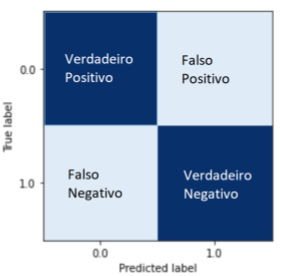

Após a classificação dos elementos a partir dos modelos classificatórios, os resultados são colocados em quatro diferentes quadrantes. Na diagonal principal (em azul escuro) estão os valores corretamente classificados, com Verdadeiros Positivos (VP) e Verdadeiros Negativos (VN). Fora dessa diagonal se encontram os erros cometidos, os Falsos Positivos (FN) e Falsos Negativos(FN) (Franceschi, 2019).

A partir dos valores obtidos nos quadrantes, outras métricas podem ser extraídas, como a acurácia, com a seguinte fórmula:


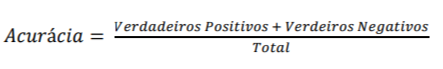

A acurácia é uma métrica simples que utiliza a razão entre todos os acertos do modelo (Verdadeiros Positivos e Verdadeiros Negativos) sobre a quantidade total de elementos usados na predição, ou seja, VP somado com VN, FP e FN.
E como a fórmula não utiliza um peso aplicado, é importante ressaltar que apenas utilizando a acurácia não é possível avaliar o desempenho dos modelos (Chen, et al, 2020).

### 7.2 Resultados

In [ ]:
#Criando dataframe para os resultados gerados pelos modelos
dadosResultado = {
    'Acuracia': [ acuraciaTranformers],
    'Revocação': [revocacaoTranformers],
}
nomesLinhas = ['Tranformers']

tabelaResultados = pd.DataFrame(dadosResultado, index=nomesLinhas)

In [ ]:
print(acuraciaTranformers)
print(revocacaoTranformers)

0.8572883931554639
0.8570469798657718


In [ ]:
#Visualização dos resultados
tabelaResultados

,Acuracia,Revocação
Tranformers,0.857288,0.857047


Como foi possivel observar acima, foram feitos 3 modelos para utilização dos resultados de BOW e do Word2Vec. Sendo eles:

1.   6.1 - Naive Bayes bag of words, com 0.72 de acurácia.
2.   6.2 - Naive Bayes Word2Vec, com 0.5 de acurácia.
1.   6.3 - Rede Neural Word2Vec, com 0.649 de acurácia.


Vale mencionar que a principal metrica utilizada para medir o desenpenho dos modelo foi a acurácia.

### 7.3 Matrizes de confusão

Abaixo esta a função utilizada para plotar as matrizes:

In [ ]:
def plotarMatriz(matriz,cor):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt="d", cmap=cor)
    plt.title("Matriz de Confusão")
    plt.xlabel(" valor previsto")
    plt.ylabel("Valor verdadeiro")
    plt.show()

Matriz de confusão transformers

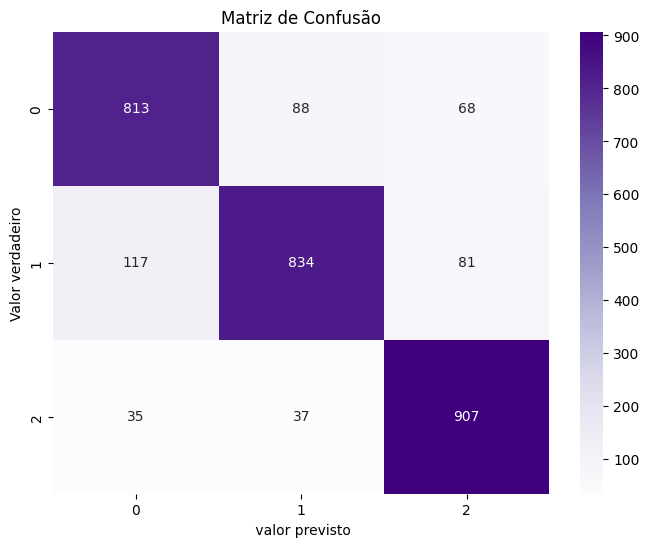

In [ ]:
plotarMatriz(matrizTransformers,"Purples")

Também vale mencionar, que a rede Neural Word2VEC a matriz de confusão do modelo foi analisada, contendo 883 verdadeiros positivos, 628 falso positivos, 451 falso negativos e 1113 verdadeiros negativos. Indicando uma tendência do modelo a ter acertos mais precisos sobre comentários negativos. Sendo esse um bom indício, uma vez que essa é a classe mais importante de ser corretamente classificada.

### 7.4 Conclusão

Os resultados que tiveram os melhores resultados foram o do Naive Bayes com Bag of words e a rede neural com Word2Vec. Sendo o menor deles o Naive Bayes com Word2Vec, uma vez que ele não e um input adequado para o modelo.
Ja entre os dois modelos com maiores resultados, o que se destacou foi o Naive Bayes com bag of words, se destacando com 7% a mais de acurácia que a rede neural.
Também sendo importante destacar a importância da aplicação de outras métricas de avaliação, como revocação, que identifica a relação entre Verdadeiros Positivos com Falsos Negativos.

## 8.0 Referências

CHEN, D., NIGRI, E., OLIVEIRA, G.,SEPULVENE, L., ALVES, T.: Métricas de Avaliação em Machine Learning: Classificação - Kunumi Blog, medium, 2020.

FRANCESCHI, P, R.: Modelagens Preditivas de Churn: O Caso do Banco do Brasil, Universidade do Vale do Rio dos Sinos, 2019.